# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 109 (delta 42), reused 94 (delta 27), pack-reused 0
Receiving objects: 100% (109/109), 33.19 MiB | 22.00 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

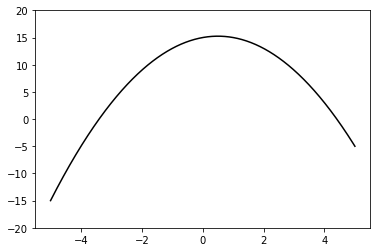

In [3]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [4]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

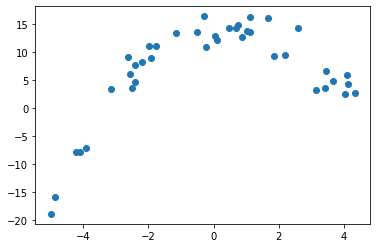

In [5]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [6]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [14]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(degree=polyDegree,include_bias=False)
    X = poly.fit_transform(X.reshape(-1,1))

    return X
X_poly=addPoly(X,200)


In [18]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [25]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y, test_size=0.2)

In [26]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [33]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)

model_no_reg = LinearRegression(normalize=True).fit(X_train,y_train)

Training error (rmse): 0.3947299584079246
Testing error (rmse): 21558612.911166474


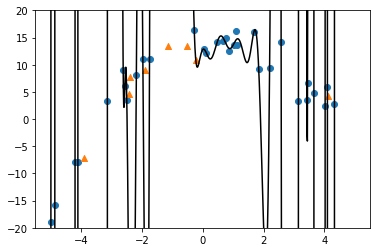

Polynomial coefficients
[12.783306116308417, 6.8203285039734105, -128.8486264840039, 77.48203386453824, 1771.393821045362, -4048.2556395518577, 869.1787736274306, 4796.099098157414, -3121.2480311006766, -2236.4530357289195, 2196.113520223628, 483.3067788954428, -761.7059920284246, -33.05819996469089, 150.53746501972827, -5.457827662449306, -17.187051370908126, 1.1762457010131975, 1.0260067096297985, -0.061616456148762634, -0.01830070390280914, -0.001607170287121285, -0.0008129250524795574, 0.0001487041273497706, 1.4697229945124495e-05, 4.951460398708067e-06, 9.18911688727954e-07, -1.0586702061961464e-07, 5.815100103824797e-09, -1.1348961250999578e-08, -5.511783951292915e-10, -3.4194572550669856e-10, -1.3074403342390236e-11, -1.0215640010547785e-12, 4.2645276735983927e-13, 3.96168626399448e-13, 3.6067618972846907e-14, 2.2776580173900858e-14, 9.290535773500844e-16, 7.868922817411284e-16, -1.6940601505461906e-17, 1.7749054770095866e-17, -3.014579979694722e-18, 1.126239237074882e-19, -1.85

In [34]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [53]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)

model_L1_reg = linear_model.Lasso(alpha=.1,normalize=True).fit(X_train, y_train)

Training error (rmse): 2.0959859676785015
Testing error (rmse): 2.202189915756532


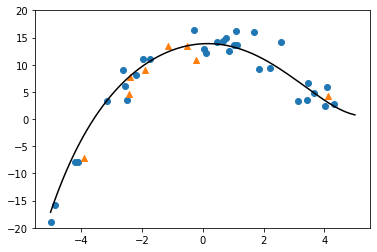

Polynomial coefficients
[13.858980211123033, 0.2912424119072769, -0.8813370484302516, 0.0037376926137340453, -0.0, 0.0022506529534967222, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0

In [54]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [51]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)

model_L2_reg = linear_model.Ridge(alpha=.1,normalize=True).fit(X_train, y_train)

Training error (rmse): 2.110821605444413
Testing error (rmse): 2.128860061917934


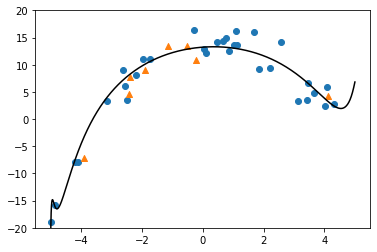

Polynomial coefficients
[13.230011389555889, 0.4117188071485767, -0.576734123297287, 0.01171019243814834, -0.012768096869833885, 0.0006800150393058217, -0.00024247832656545937, 3.206363756714674e-05, -3.6376261029147856e-06, 1.2105455861248574e-06, -1.971004823663282e-08, 3.928956200401911e-08, 1.6635968901199876e-09, 1.1386493318410291e-09, 1.1127709864370489e-10, 2.9575639164677436e-11, 5.175367312162101e-12, 6.580060629747992e-13, 2.151491059065324e-13, 1.0135394607267871e-14, 8.531289054990619e-15, -7.301469223725464e-17, 3.3082074968006857e-16, -1.660392016714636e-17, 1.268609692621816e-17, -1.0430117068728484e-18, 4.836773734067073e-19, -5.1801518470666136e-20, 1.8383442614304803e-20, -2.324999889947492e-21, 6.974293349196236e-22, -9.871487904974609e-23, 2.642585826947113e-23, -4.0493979672835424e-24, 1.0002456640970685e-24, -1.623306091775606e-25, 3.7821832666858255e-26, -6.4026048732312454e-27, 1.428577062865532e-27, -2.4952894595134637e-28, 5.389342771174716e-29, -9.6365072359

In [52]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [48]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-1.898524,8.956020,-3.771258e+01,10.370248,10.370248
1,-2.395077,7.723543,-5.462181e+01,7.859845,7.859845
2,-0.520304,13.478608,2.073985e+02,13.794114,13.794114
3,-1.150989,13.436894,2.243513e+03,12.758708,12.758708
4,-0.234030,10.927272,1.122876e+01,14.045845,14.045845
5,-2.410832,4.690236,-4.531716e+01,7.766316,7.766316
6,-3.909422,-7.163796,-6.097600e+07,-5.145377,-5.145377
7,4.130111,4.299534,-3.441254e+05,3.990806,3.990806
